# Sheet Music Reader Convolution Neural Network

## Import Necessary Libraries

In [5]:
# ===============================
# 💡 Stable Import Setup
# ===============================

import os
import sys

# --- Fix OpenMP / libiomp5md.dll conflict (Torch + OpenCV) ---
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# --- Detect environment: Jupyter vs script ---
def is_notebook():
    try:
        shell = get_ipython().__class__.__name__
        return shell == "ZMQInteractiveShell"  # Jupyter or VSCode interactive
    except NameError:
        return False  # Standard Python script

# --- Configure matplotlib backend accordingly ---
import matplotlib
if is_notebook():
    # Inline plotting for Jupyter
    matplotlib.use('module://matplotlib_inline.backend_inline')
else:
    # Non-interactive backend for scripts
    matplotlib.use("Agg")

import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2

print("✅ Environment initialized safely.")
print("Matplotlib backend:", matplotlib.get_backend())
print("Torch version:", torch.__version__)
print("OpenCV version:", cv2.__version__)


✅ Environment initialized safely.
Matplotlib backend: module://matplotlib_inline.backend_inline
Torch version: 2.8.0+cpu
OpenCV version: 4.10.0


## Make CNN Model

In [6]:
class NoteCNN(nn.Module):
    def __init__(self, num_pitches, num_durations):
        super().__init__()
        """
        A Convolutional Neural Network for predicting musical note pitches and durations.
        Args:
            num_pitches (int): Number of unique pitch classes.
            num_durations (int): Number of unique duration classes.
        Input:
            x (torch.Tensor): Input tensor of shape (batch_size, 1, height, width)
        Output:
            pitch_out (torch.Tensor): Output tensor for pitch classification of shape (batch_size, num_pitches)
            dur_out (torch.Tensor): Output tensor for duration classification of shape (batch_size, num_durations)
        """
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # works for input 32x32
        self.pitch_head = nn.Linear(128, num_pitches)
        self.duration_head = nn.Linear(128, num_durations)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        pitch_out = self.pitch_head(x)
        dur_out = self.duration_head(x)
        return pitch_out, dur_out

## Train and Test

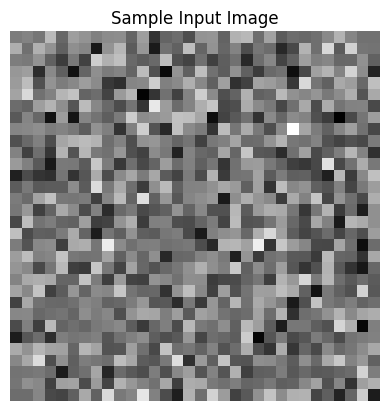

Pitch output shape: torch.Size([1, 86])
Duration output shape: torch.Size([1, 9])


In [ ]:
if __name__ == "__main__":
    # Frequencies dictionary
    FREQ = {
        "C1": 32, "C#1": 34, "Db1": 34, "D1": 36, "D#1": 38, "Eb1": 38, "E1": 41, "F1": 43, "F#1": 46,
        "Gb1": 46, "G1": 49, "G#1": 52, "Ab1": 52, "A1": 55, "A#1": 58, "Bb1": 58, "B1": 61, "C2": 65,
        "C#2": 69, "Db2": 69, "D2": 73, "D#2": 77, "Eb2": 77, "E2": 82, "F2": 87, "F#2": 92, "Gb2": 92,
        "G2": 98, "G#2": 104, "Ab2": 104, "A2": 110, "A#2": 116, "Bb2": 116, "B2": 123, "C3": 130,
        "C#3": 138, "Db3": 138, "D3": 146, "D#3": 155, "Eb3": 155, "E3": 164, "F3": 174, "F#3": 185,
        "Gb3": 185, "G3": 196, "G#3": 208, "Ab3": 208, "A3": 220, "A#3": 233, "Bb3": 233, "B3": 246,
        "C4": 261, "C#4": 277, "Db4": 277, "D4": 293, "D#4": 311, "Eb4": 311, "E4": 329, "F4": 349,
        "F#4": 369, "Gb4": 369, "G4": 392, "G#4": 415, "Ab4": 415, "A4": 440, "A#4": 466, "Bb4": 466,
        "B4": 493, "C5": 523, "C#5": 554, "Db5": 554, "D5": 587, "D#5": 622, "E5": 659, "Eb5": 659,
        "F5": 698, "F#5": 739, "Gb5": 739, "G5": 784, "G#5": 830, "Ab5": 830, "A5": 880, "A#5": 932,
        "Bb5": 932, "B5": 987, "rest": 0.0067,
    }

    DUR = {
        "double": 4.0,
        "whole": 2.0,
        "half": 1.0,
        "quarter": 0.5,
        "eighth": 0.25,
        "sixteenth": 0.06,
        "thirty_second": 0.03,
        "sixty_fourth": 0.02,
        "hundred_twenty_eighth": 0.01,
    }

    model = NoteCNN(num_pitches=len(FREQ), num_durations=len(DUR))

    # Create a sample grayscale image (batch size 1, 1 channel, 32x32)
    sample_input = torch.randn(1, 1, 32, 32)
    # Visualize sample image
    plt.imshow(sample_input[0, 0].detach().numpy(), cmap='gray')
    plt.title("Sample Input Image")
    plt.axis('off')
    plt.show() 

    pitch_out, dur_out = model(sample_input)
    print("Pitch output shape:", pitch_out.shape)  # (1, num_pitches)
    print("Duration output shape:", dur_out.shape)  # (1, num_durations)
    
    # Define Citerion
    criterion_pitch = model.CrossEntropyLoss()
    criterion_duration = model.CrossEntropyLoss()
    
    # Define Optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
    for images, pitch_labels, dur_labels in dataloader:
        optimizer.zero_grad()
        pitch_out, dur_out = model(images)
        loss_pitch = criterion(pitch_out, pitch_labels)
        loss_dur = criterion(dur_out, dur_labels)
        loss = loss_pitch + loss_dur
        loss.backward()
        optimizer.step()
    
    